<h1 style="font-size: 50px;text-align: center;">⭐Principal Component Analysis⭐</h1>

### Imports 👇

In [1]:
import pandas
import numpy
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.decomposition import PCA
import seaborn
import matplotlib.pyplot as pyplot
import warnings
warnings.filterwarnings("ignore")

### Creating the SVM model instance(object) 👇
This model will be used for checkin working of the data before and after tranformation of data using PCA

In [2]:
model_for_normal_data=svm.SVC()
model_for_Transformed_data=svm.SVC()
temp_model=svm.SVC()

In [31]:
classes_list=['Low Stress','Normal Stress','High Stress']

##### 👇 setting the matplotlib configurations

In [3]:
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

# Data Reading 👇

In [42]:
data=pandas.read_csv('./Stress-Lysis.csv')

### 👇 cheking the columns, data, data type information, correlation between attributes

In [5]:
data.columns

Index(['Humidity', 'Temperature', 'Step count', 'Stress Level'], dtype='object')

In [6]:
data

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


#### 👇 checking the available number of classes

In [7]:
data['Stress Level'].value_counts()

1    790
2    710
0    501
Name: Stress Level, dtype: int64

In [8]:
data.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [44]:
data.corr()

,Humidity,Temperature,Step count,Stress Level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step count,0.870486,0.870486,1.000000,0.832623
Stress Level,0.936036,0.936036,0.832623,1.000000


### 👇 Scatter plot of the data

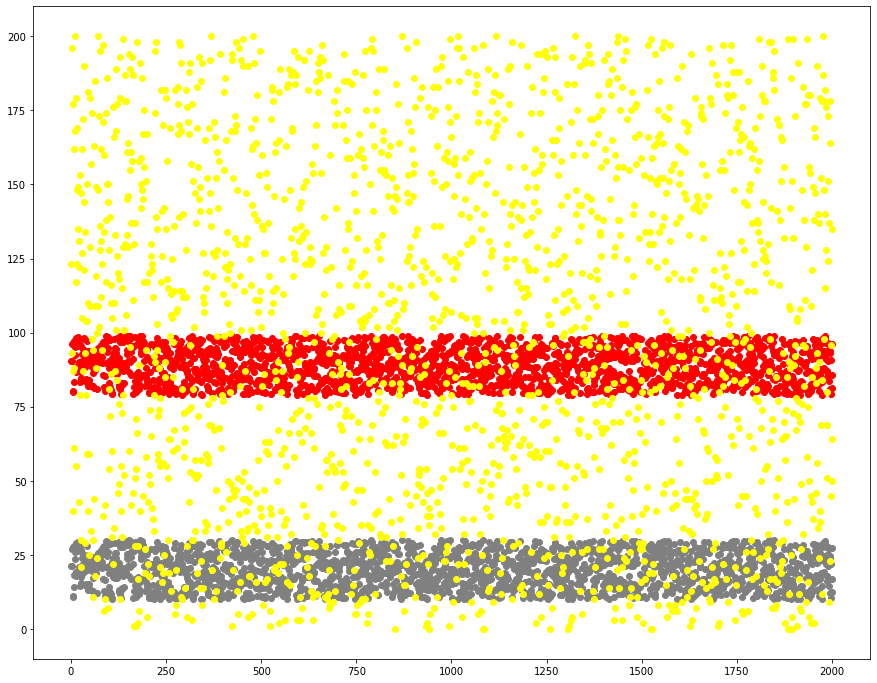

In [9]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['Humidity'],color = 'gray')
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['Temperature'],color = 'red')
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['Step count'],color = 'yellow')

### 👇Attribute comparison paring graph of normal Data
here each graph is drawn by one to one manner

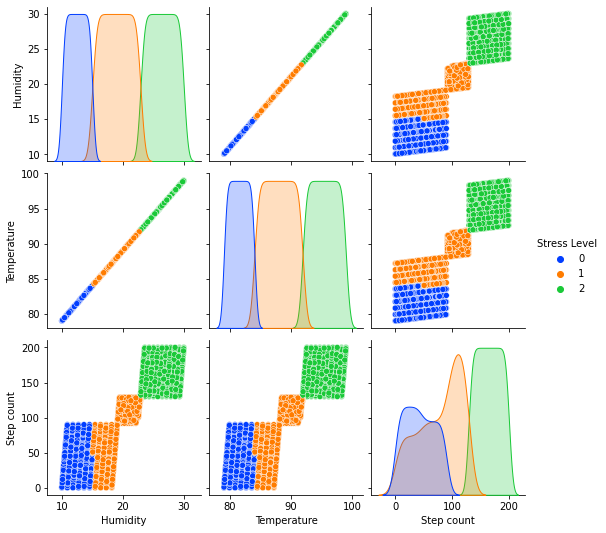

In [11]:
seaborn.pairplot(data.iloc[:,:4], hue="Stress Level",palette="bright")

<h1 style="font-size: 60px;text-align: center;">Dimensionality Reduction</h1>
<h1 style="font-size: 40px;text-align: center;">Principal Component Analysis Transformation</h1>

### creating instance of PCA 👇

In [12]:
Principal_Component_Analyser=PCA(n_components=2)

### Number of Principle components is 2 👆
#### means any number of features will be converted in to 2 features    ( M features ----> 2 features)



In [13]:
Component_Data=Principal_Component_Analyser.fit_transform(data.iloc[:,:3])

### 👇 Mean of each features

In [14]:
Principal_Component_Analyser.mean_

array([ 20.        ,  89.        , 100.14142929])

### 👇 Covariance matrix of the Given Data

In [15]:
Principal_Component_Analyser.get_covariance()

array([[  33.38335   ,   33.38335   ,  292.63246   ],
       [  33.38335   ,   33.38335   ,  292.63246   ],
       [ 292.63246   ,  292.63246   , 3385.25548776]])

In [18]:
Transformed_Data=pandas.DataFrame({"Stress Level":data['Stress Level']})

In [19]:
Transformed_Data['column1']=[i[0] for i in Component_Data]
Transformed_Data['column2']=[i[1] for i in Component_Data]

## 👇 Tranformed Data

In [20]:
Transformed_Data

,Stress Level,column1,column2
0,1,-22.917372,0.919842
1,1,6.845065,-2.849788
2,2,-96.371111,1.692140
3,2,-77.602484,-1.354078
4,0,14.617497,11.213373
...,...,...,...
1996,1,3.796755,-3.059557
1997,0,56.376631,6.682642
1998,2,-35.843350,-5.884810
1999,0,37.171811,6.177588


In [21]:
Transformed_Data.describe()

,Stress Level,column1,column2
count,2001.000000,2.001000e+03,2.001000e+03
mean,1.104448,-4.974864e-15,3.696305e-16
std,0.771094,5.861815e+01,3.991895e+00
min,0.000000,-1.008378e+02,-9.667730e+00
25%,0.000000,-5.101713e+01,-2.628059e+00
50%,1.000000,-1.109055e+00,-1.355322e-01
75%,2.000000,5.114444e+01,2.514040e+00
max,2.000000,1.011186e+02,1.153700e+01


### 👇Attribute comparison paring graph of Transformed Data
here each graph is drawn by one to one manner

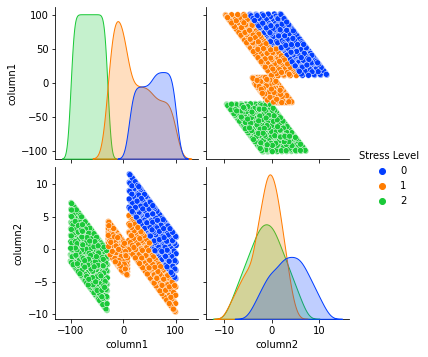

In [23]:
seaborn.pairplot(Transformed_Data,hue="Stress Level",palette="bright")

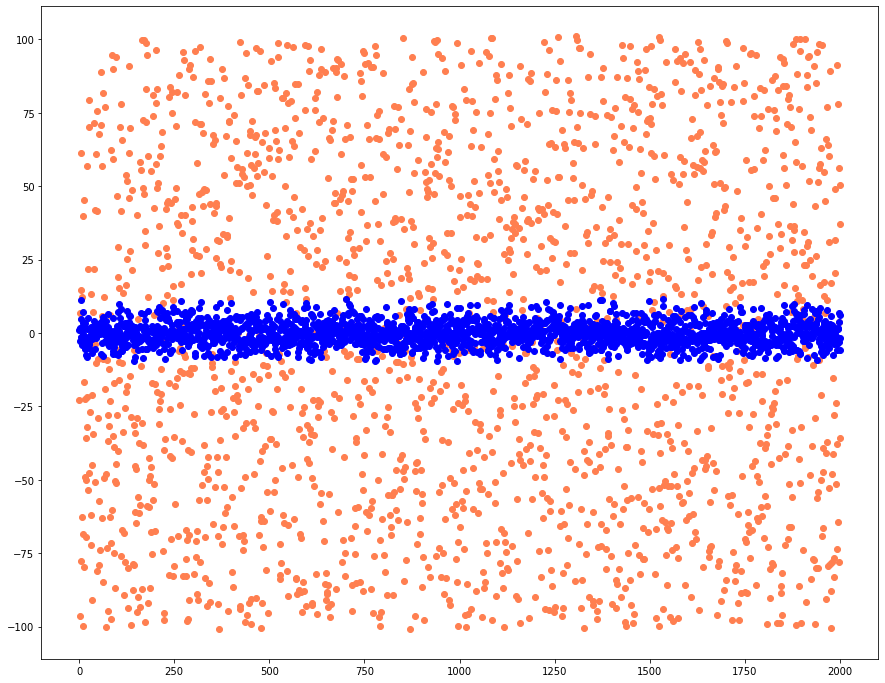

In [24]:
pyplot.scatter(x=[i for i in range(1,len(Transformed_Data)+1)],y=Transformed_Data['column1'],color = 'coral')
pyplot.scatter(x=[i for i in range(1,len(Transformed_Data)+1)],y=Transformed_Data['column2'],color='blue')

<h1 style="font-size: 60px;text-align: center;">Training and Testing on Data before Tranformation by PCA</h1>

# Data Preparation for Training and testing on Normal Data

### Suffling the data set 👇
this is to get splitted data, that have all type of the classes in training and testing

In [26]:
shuffled_Data=data.sample(frac=1)
Training_Data = shuffled_Data[:1700]
Testing_Data = shuffled_Data[1700:]

## Splitting the dataset into training and testing 👆

For Training 85% data is being used and for testing 15% data is used from the given data

means 850 rows will be used for training and 150 rows will be used for testing

## Dividing the training data features and labels 👇 
this will be used for training of SVM model

In [28]:
training_Labels=Training_Data['Stress Level']
training_Features=Training_Data.drop(['Stress Level'],axis=1)
testing_Labels=Testing_Data['Stress Level']
testing_Features=Testing_Data.drop(['Stress Level'],axis=1)

## dividing the testing data features and labels 👆
this will be used for testing the SVM model

## fitting the model 👇

In [29]:
model_for_normal_data.fit(training_Features,training_Labels)

SVC()

### Now model is Trained 👆

## ________________________________________________________________________

## Optional Part 👇
### checking model on training data to check training accuracy (not needed)
### plotting the confusion matrix for model on training data
### calculating the accuracy of the model and precision of the respective classes

               precision    recall  f1-score   support

   Low Stress       1.00      1.00      1.00       420
Normal Stress       1.00      1.00      1.00       683
  High Stress       1.00      1.00      1.00       597

     accuracy                           1.00      1700
    macro avg       1.00      1.00      1.00      1700
 weighted avg       1.00      1.00      1.00      1700



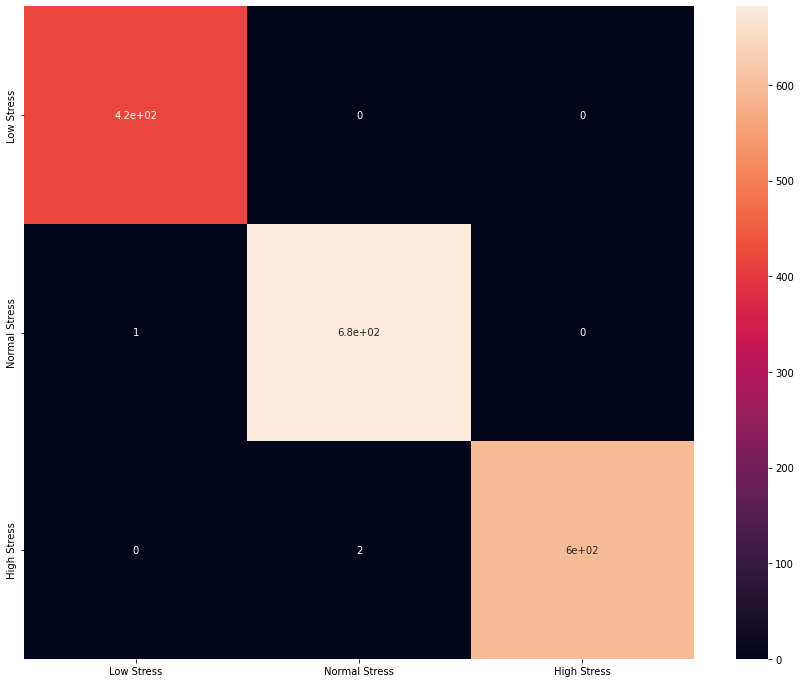

In [32]:
training_predicted_values=model_for_normal_data.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(training_Labels,training_predicted_values,target_names=classes_list))

# Now Testing the model 👇

## plotting the confusion matrix for model of tested data
### calculating the accuracy of the model and precision of the respective classes

               precision    recall  f1-score   support

   Low Stress       1.00      1.00      1.00        81
Normal Stress       1.00      1.00      1.00       107
  High Stress       1.00      1.00      1.00       113

     accuracy                           1.00       301
    macro avg       1.00      1.00      1.00       301
 weighted avg       1.00      1.00      1.00       301



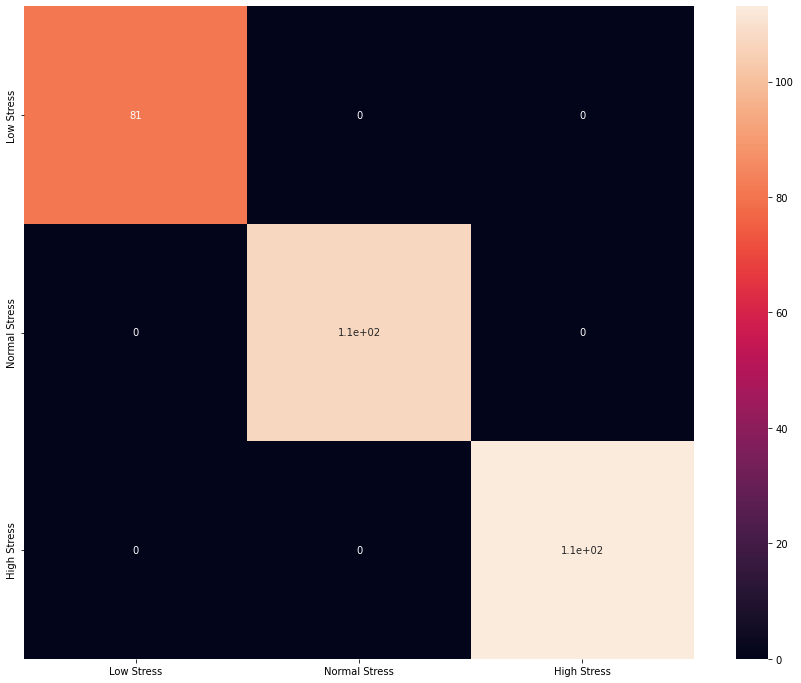

In [33]:
predicted_values=model_for_normal_data.predict(testing_Features)
classification_data=confusion_matrix(testing_Labels,predicted_values)
seaborn.heatmap(classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(testing_Labels,predicted_values,target_names=classes_list))

<h1 style="font-size: 50px;text-align: center;">Training and Testing on Transformed Data after Tranformation by PCA</h1>

# Data Preparation for Training and testing on Transformed Data

### Suffling the Transformed data set because PCA is unsupervised, hence label are same as previous👇
this is to get splitted data, that have all type of the classes in training and testing

In [34]:
Tranformed_shuffled_Data=Transformed_Data.sample(frac=1)
Tranformed_Training_Data = Tranformed_shuffled_Data[:1700]
Tranformed_Testing_Data = Tranformed_shuffled_Data[1700:]

## Splitting the dataset into training and testing 👆

For Training 85% data is being used and for testing 15% data is used from the given data

means 850 rows will be used for training and 150 rows will be used for testing

## Dividing the training data features and labels 👇 
this will be used for training of SVM model

In [36]:
Tranformed_training_Labels=Tranformed_Training_Data['Stress Level']
Tranformed_training_Features=Tranformed_Training_Data.drop(['Stress Level'],axis=1)
Tranformed_testing_Labels=Tranformed_Testing_Data['Stress Level']
Tranformed_testing_Features=Tranformed_Testing_Data.drop(['Stress Level'],axis=1)

## dividing the testing data features and labels 👆
this will be used for testing the SVM model

## fitting the model on Transformed Data 👇

In [37]:
model_for_Transformed_data.fit(Tranformed_training_Features,Tranformed_training_Labels)

SVC()

### checking model on training data to check training accuracy (not needed)
### plotting the confusion matrix for model on training data
### calculating the accuracy of the model and precision of the respective classes

               precision    recall  f1-score   support

   Low Stress       1.00      1.00      1.00       424
Normal Stress       1.00      1.00      1.00       673
  High Stress       1.00      1.00      1.00       603

     accuracy                           1.00      1700
    macro avg       1.00      1.00      1.00      1700
 weighted avg       1.00      1.00      1.00      1700



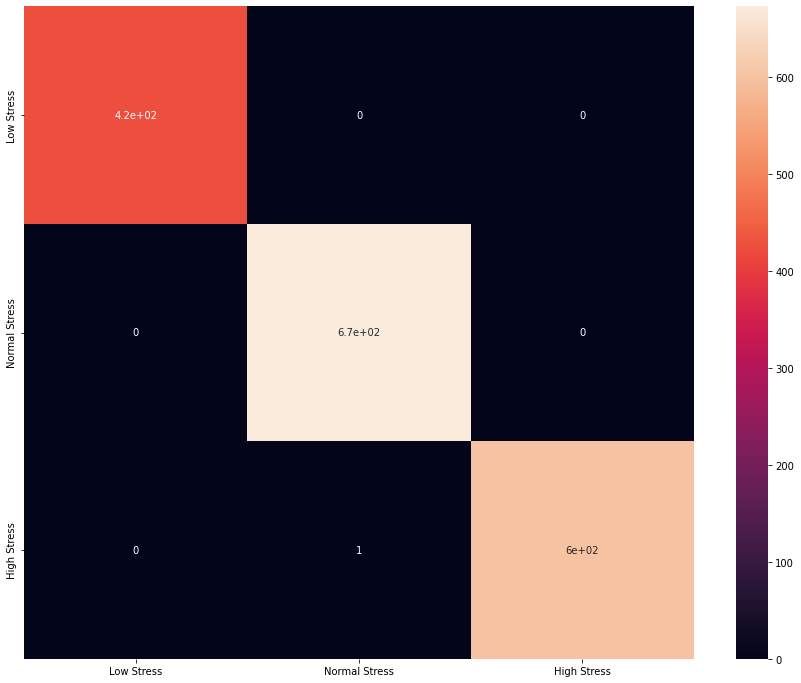

In [38]:
Transformed_training_predicted_values=model_for_Transformed_data.predict(Tranformed_training_Features)
Transformed_training_classification_data=confusion_matrix(Tranformed_training_Labels,Transformed_training_predicted_values)
seaborn.heatmap(Transformed_training_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(Tranformed_training_Labels,Transformed_training_predicted_values,target_names=classes_list))

# Now Testing the model 👇
## plotting the confusion matrix for model of tested data
### calculating the accuracy of the model and precision of the respective classes

               precision    recall  f1-score   support

   Low Stress       0.99      1.00      0.99        77
Normal Stress       1.00      0.99      1.00       117
  High Stress       1.00      1.00      1.00       107

     accuracy                           1.00       301
    macro avg       1.00      1.00      1.00       301
 weighted avg       1.00      1.00      1.00       301



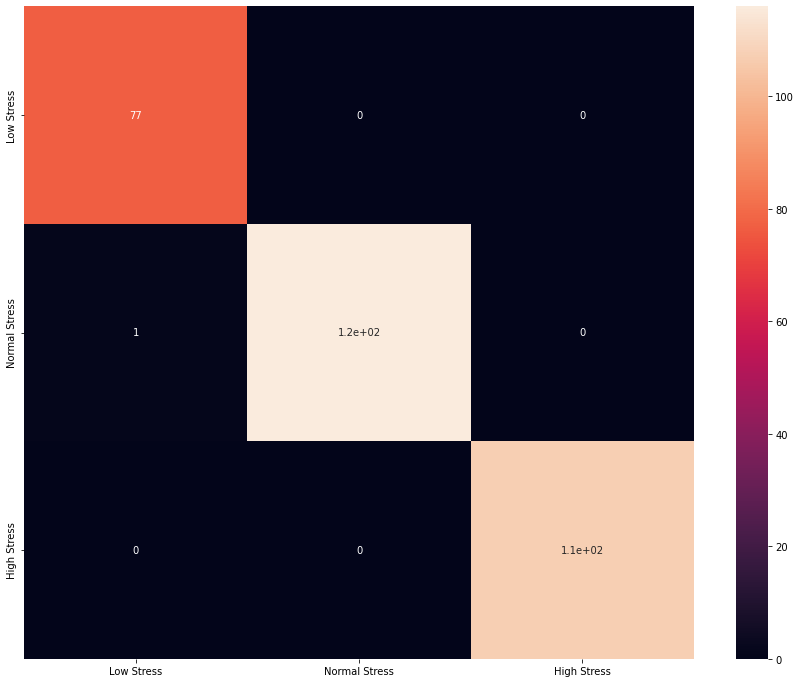

In [39]:
Transformed_predicted_values=model_for_Transformed_data.predict(Tranformed_testing_Features)
Transformed_classification_data=confusion_matrix(Tranformed_testing_Labels,Transformed_predicted_values)
seaborn.heatmap(Transformed_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(Tranformed_testing_Labels,Transformed_predicted_values,target_names=classes_list))

<h1 style="font-size: 50px;text-align: center;">If we just remove one column rather than using PCA, then Accuracy changed as following</h1>

               precision    recall  f1-score   support

   Low Stress       0.60      0.74      0.66        70
Normal Stress       0.80      0.68      0.73       108
  High Stress       1.00      1.00      1.00       123

     accuracy                           0.82       301
    macro avg       0.80      0.81      0.80       301
 weighted avg       0.84      0.82      0.83       301



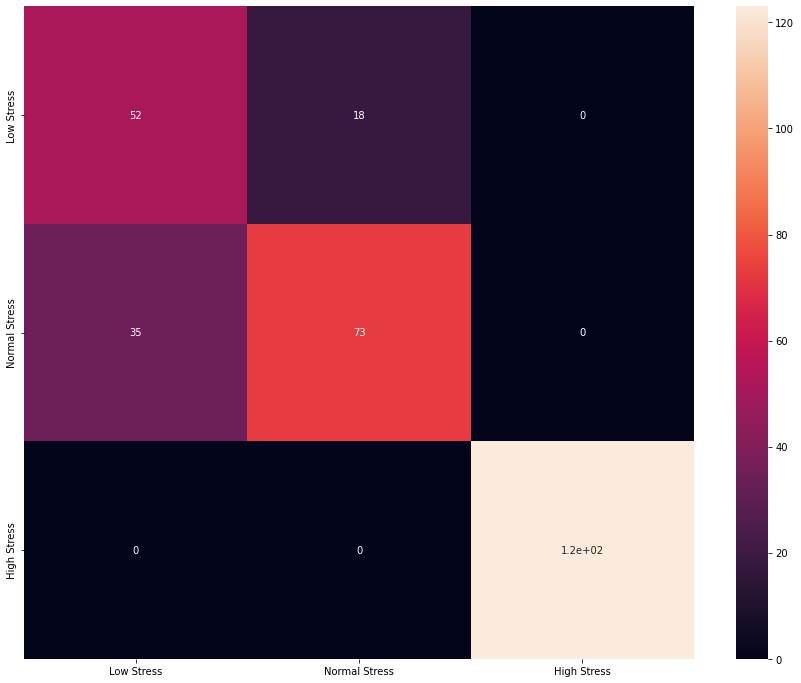

In [51]:
temp_shuffled_Data=data.sample(frac=1)
temp_Training_Data = temp_shuffled_Data[:1700]
temp_Testing_Data = temp_shuffled_Data[1700:]
temp_training_Labels=temp_Training_Data['Stress Level']
temp_training_Features=temp_Training_Data.drop(['Stress Level','Humidity','Temperature'],axis=1)
temp_testing_Labels=temp_Testing_Data['Stress Level']
temp_testing_Features=temp_Testing_Data.drop(['Stress Level','Humidity','Temperature'],axis=1)
temp_model.fit(temp_training_Features,temp_training_Labels)
temp_predicted_values=temp_model.predict(temp_testing_Features)
temp_classification_data=confusion_matrix(temp_testing_Labels,temp_predicted_values)
seaborn.heatmap(temp_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(temp_testing_Labels,temp_predicted_values,target_names=classes_list))

<h1 style="font-size: 85px;text-align: center;">⚡Summery⚡</h1>

## Features before PCA 👇
<img src="data points before transformation.png" alt="">

## Features before PCA 👇
<img src="data points after transformation.png" alt="">

# Accuracy  Before Transformnation    

In [46]:
print(classification_report(testing_Labels,predicted_values,target_names=classes_list))

               precision    recall  f1-score   support

   Low Stress       1.00      1.00      1.00        81
Normal Stress       1.00      1.00      1.00       107
  High Stress       1.00      1.00      1.00       113

     accuracy                           1.00       301
    macro avg       1.00      1.00      1.00       301
 weighted avg       1.00      1.00      1.00       301



# Testing accuracy is 100% before applying PCA 👆

# Accuracy  After Transformnation

In [47]:
print(classification_report(Tranformed_testing_Labels,Transformed_predicted_values,target_names=classes_list))

               precision    recall  f1-score   support

   Low Stress       0.99      1.00      0.99        77
Normal Stress       1.00      0.99      1.00       117
  High Stress       1.00      1.00      1.00       107

     accuracy                           1.00       301
    macro avg       1.00      1.00      1.00       301
 weighted avg       1.00      1.00      1.00       301



# Testing accuracy is 100% After applying PCA 👆

In [52]:
print(classification_report(temp_testing_Labels,temp_predicted_values,target_names=classes_list))

               precision    recall  f1-score   support

   Low Stress       0.60      0.74      0.66        70
Normal Stress       0.80      0.68      0.73       108
  High Stress       1.00      1.00      1.00       123

     accuracy                           0.82       301
    macro avg       0.80      0.81      0.80       301
 weighted avg       0.84      0.82      0.83       301



## 👆 If we just remove one column rather than using PCA, then Accuracy become 55%

## if we use PCA then M features get transformed/Reduced in N features with having similar data properties with original data, hence it is able to show similar accuracy as like as original data even having less features
## but if we reduce the number of columns manualy by just removing it then we can loose some important features of the original data, hence accuracy for model can get reduced